In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from MakeDataset import X_train, y_train,X_test, y_test, classes,X_val, y_val
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import tree
%matplotlib inline
%pip install tsfel
import tsfel

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Q1.) Plotting Waveforms for different activities. We plot accelerations along the x,y and z axis with respect to time for all of the activities.

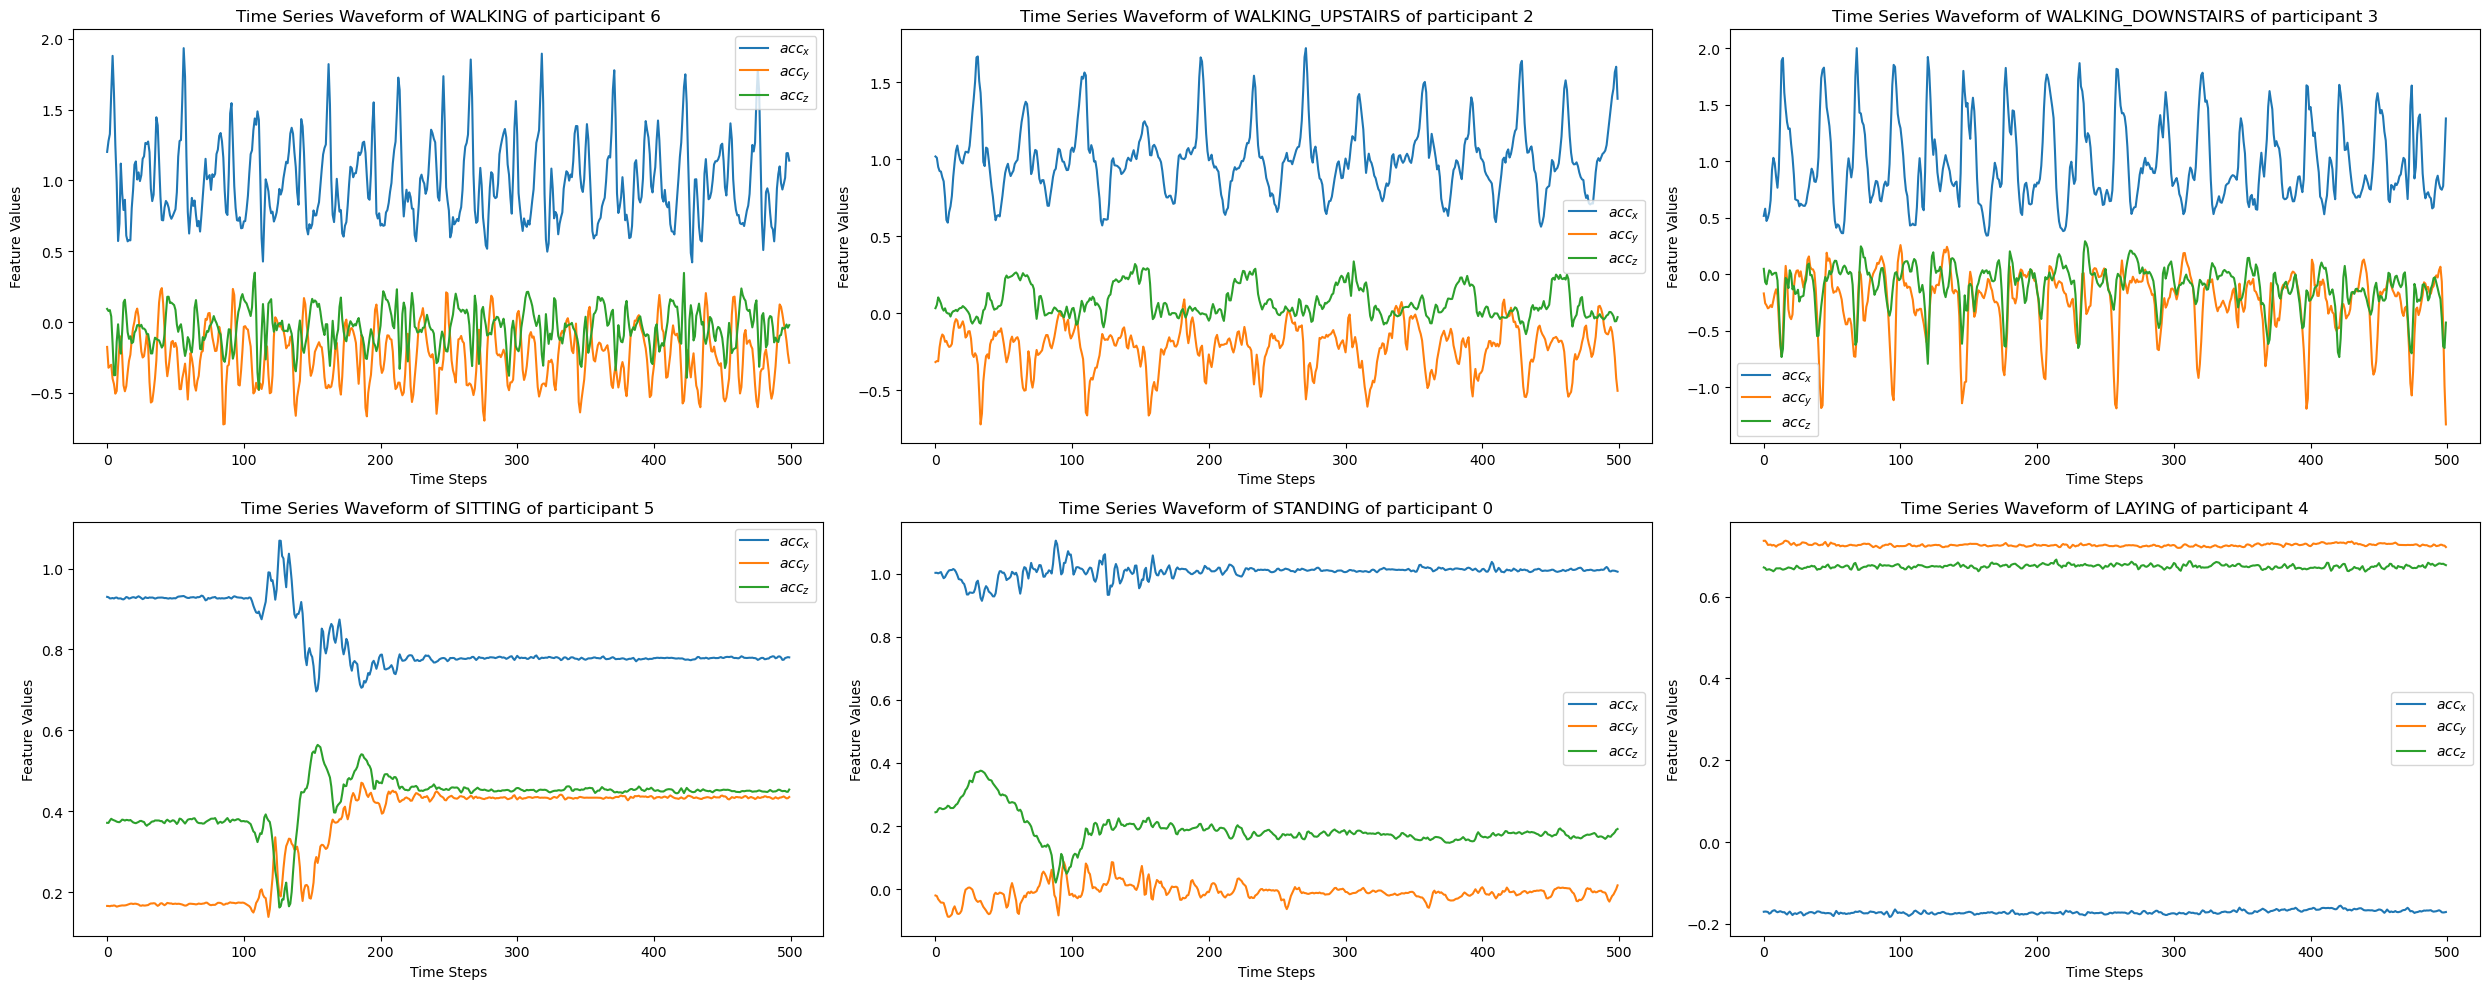

In [57]:
def plot_unique_samples(X,y,classlist):
    num_classes=len(classlist)
    num_rows=2
    num_columns=3
    keys=list(classes.keys())
    plt.figure(figsize=(25,10))
    for i,label in enumerate(classlist,start=1):
        plt.subplot(num_rows,num_columns,i)
        indices=np.where(y==label)[0]
        if indices.size>0:
            Xsample=X[indices[0]]
            time_steps=np.arange(Xsample.shape[0])
            plt.plot(time_steps,Xsample[:,0],label='$acc_x$')
            plt.plot(time_steps,Xsample[:,1],label='$acc_y$')
            plt.plot(time_steps,Xsample[:,2],label='$acc_z$')
            plt.xlabel('Time Steps')
            plt.ylabel('Feature Values')
            plt.title(f'Time Series Waveform of {keys[label-1]} of participant {indices[0]}')
            plt.legend() 
    plt.tight_layout()
    plt.show()
    return

# classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6} ## defined earlier in MakeDataset.py.
classlist=np.unique(y_train)
plot_unique_samples(X_train,y_train,classlist)



## add participant id in plots

We can observe distinct patterns for each of the activities based on acceleration data. From this, one can infer certain correlations between acceleration and the activity from the data. So, we hypothesise that a model will be able to classify the activities based on data alone.

Q2.) We will plot linear acceleration for each activity

In [58]:
X_train_linear=np.sum(X_train**2,axis=2)
X_test_linear=np.sum(X_test**2,axis=2) #will be used later

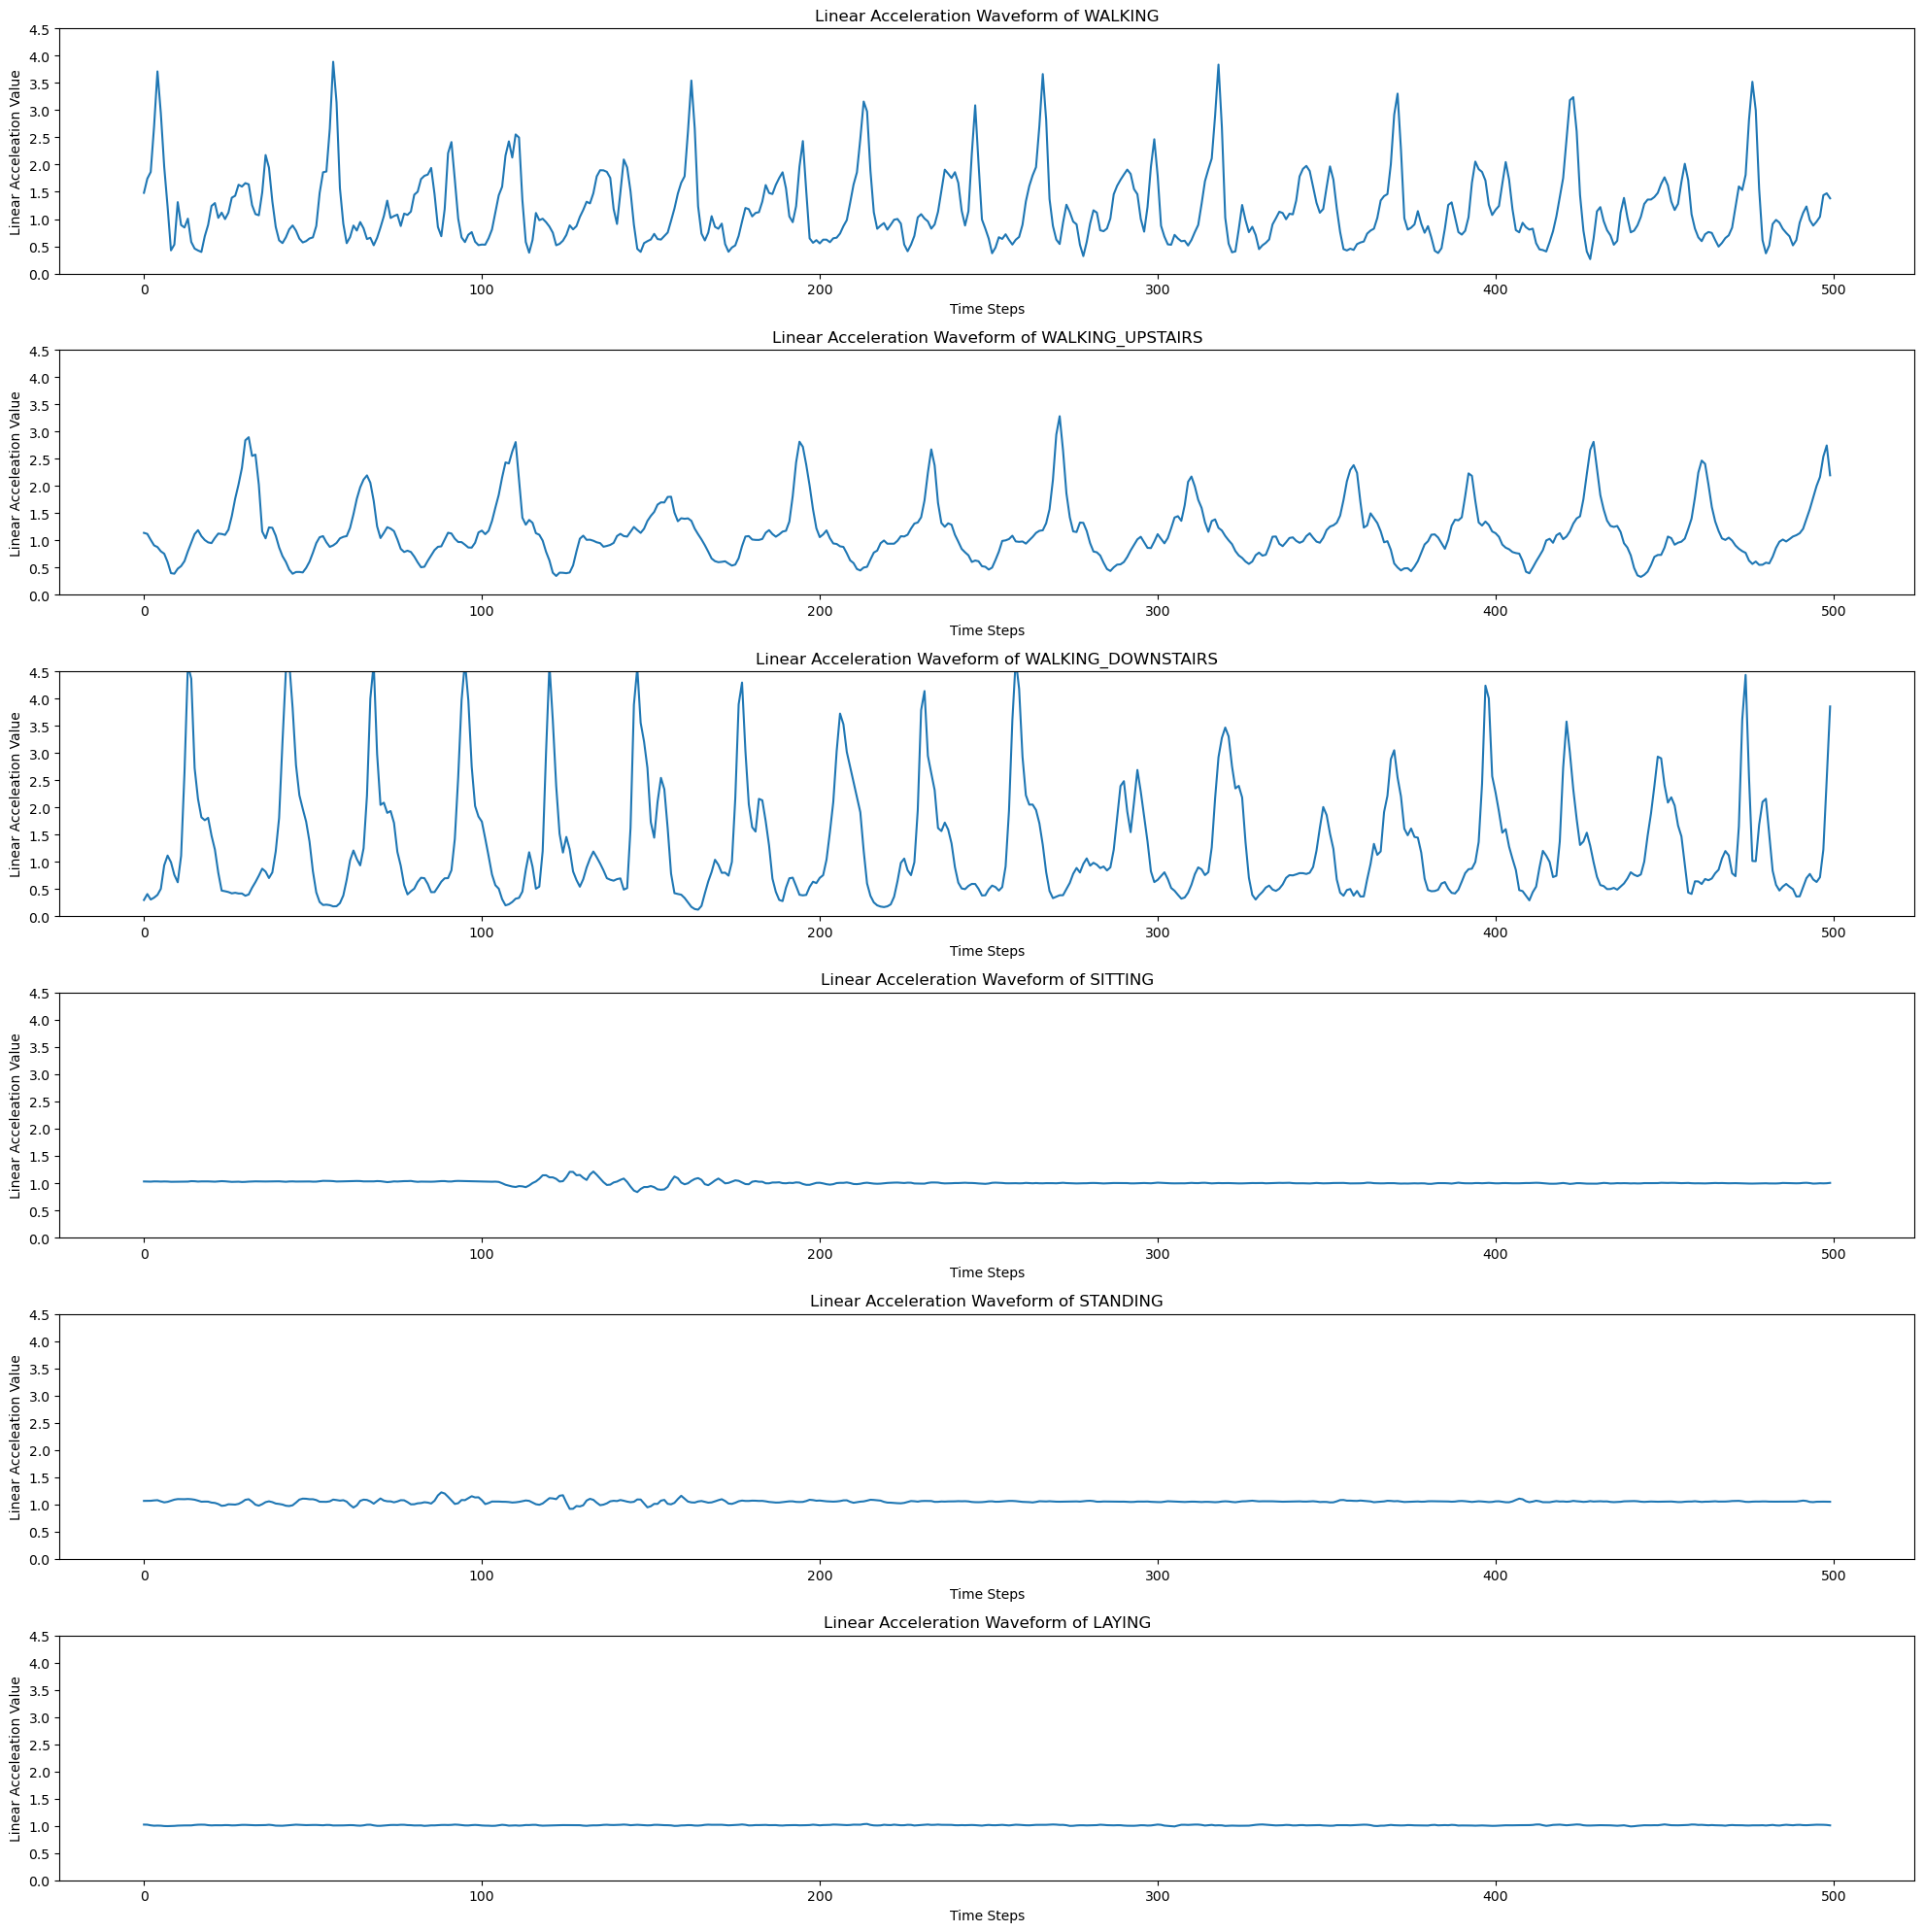

In [59]:
#2
#lets see values of linear accelerations accx^2,accy^2,accz^2 for each activity to see if there is a pattern.\
def calc_avg_acc(class_label,X,y):
    indices=np.where(y==class_label)[0]
    if indices.size>0:
            Xsample=X[indices]
            temp = np.sum(Xsample**2, axis = 2)
            return temp
    else:
          print(f"No samples for the class label{class_label}")
          return

classlist=np.unique(y_train)
plt.figure(figsize=(20,20))
keys=list(classes.keys())
for i, cls in enumerate(classlist, start=1):
      plt.subplot(6, 1, i)
      plt.plot(calc_avg_acc(i, X_train, y_train)[0])
      plt.title(f'Linear Acceleration Waveform of {keys[cls-1]}')
      plt.ylabel('Linear Acceleation Value')
      plt.xlabel('Time Steps')
      plt.tight_layout()
      plt.ylim(0, 4.5)
      

Dynamic Activities are observed to have larger variance in the net acceleration values which is visible clearly from the plot. We can also see that peak net acceleration values are higher in dynamic activities, so a rule-based system may work well as well, instead of training a ML model to differentiate between the different activities.

Q3.) To train a decision tree, there are two possible cases one is we flatten out the ax,ay,az to get 1500 features, the other case is to use the linear acceleration i.e  $a_x^2 + a_y^2 + a_z^2$ to get 500 features. We will train a decision trees on both and see accuracies.

In [62]:
#Using linear acceleration to train decision tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
clf=tree.DecisionTreeClassifier()
clf.fit(X_train_linear,y_train)

y_pred=clf.predict(X_test_linear)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
for true_label, pred_label in zip(y_test[:], y_pred[:]):
    print(f"True Label: {true_label}, Predicted Label: {pred_label}")
cm=confusion_matrix(y_test,y_pred)

Accuracy: 0.5833333333333334
True Label: 3, Predicted Label: 4
True Label: 3, Predicted Label: 2
True Label: 6, Predicted Label: 6
True Label: 2, Predicted Label: 2
True Label: 6, Predicted Label: 6
True Label: 5, Predicted Label: 5
True Label: 6, Predicted Label: 5
True Label: 1, Predicted Label: 1
True Label: 1, Predicted Label: 2
True Label: 3, Predicted Label: 2
True Label: 5, Predicted Label: 5
True Label: 6, Predicted Label: 6
True Label: 1, Predicted Label: 4
True Label: 5, Predicted Label: 5
True Label: 3, Predicted Label: 3
True Label: 4, Predicted Label: 4
True Label: 5, Predicted Label: 5
True Label: 5, Predicted Label: 5
True Label: 1, Predicted Label: 3
True Label: 6, Predicted Label: 6
True Label: 4, Predicted Label: 4
True Label: 1, Predicted Label: 1
True Label: 2, Predicted Label: 4
True Label: 5, Predicted Label: 5
True Label: 2, Predicted Label: 6
True Label: 1, Predicted Label: 1
True Label: 3, Predicted Label: 3
True Label: 6, Predicted Label: 6
True Label: 3, Pred

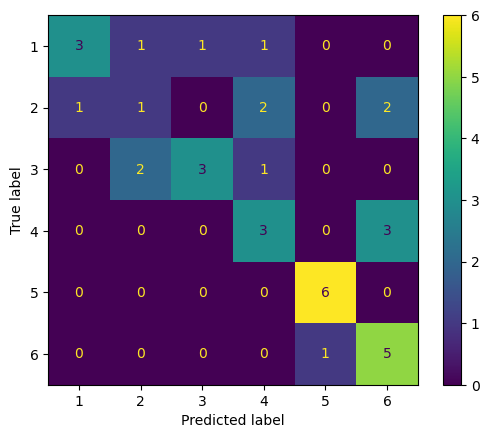

In [63]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [64]:
# Reshape X to make it 2D as scikit expects 2D shape #We get 1500 features here as we flatten the whole data
X_train_reshaped=np.reshape(X_train,(X_train.shape[0],-1))
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_reshaped, y_train)

In [67]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
X_test_reshaped=np.reshape(X_test,(X_test.shape[0],-1))
y_pred=clf.predict(X_test_reshaped)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
for true_label, pred_label in zip(y_test[:], y_pred[:]):
    print(f"True Label: {true_label}, Predicted Label: {pred_label}")
cm=confusion_matrix(y_test,y_pred)

Accuracy: 0.5833333333333334
True Label: 3, Predicted Label: 3
True Label: 3, Predicted Label: 3
True Label: 6, Predicted Label: 6
True Label: 2, Predicted Label: 3
True Label: 6, Predicted Label: 6
True Label: 5, Predicted Label: 5
True Label: 6, Predicted Label: 6
True Label: 1, Predicted Label: 2
True Label: 1, Predicted Label: 1
True Label: 3, Predicted Label: 1
True Label: 5, Predicted Label: 5
True Label: 6, Predicted Label: 6
True Label: 1, Predicted Label: 3
True Label: 5, Predicted Label: 5
True Label: 3, Predicted Label: 2
True Label: 4, Predicted Label: 4
True Label: 5, Predicted Label: 4
True Label: 5, Predicted Label: 5
True Label: 1, Predicted Label: 3
True Label: 6, Predicted Label: 6
True Label: 4, Predicted Label: 4
True Label: 1, Predicted Label: 5
True Label: 2, Predicted Label: 1
True Label: 5, Predicted Label: 4
True Label: 2, Predicted Label: 2
True Label: 1, Predicted Label: 3
True Label: 3, Predicted Label: 3
True Label: 6, Predicted Label: 6
True Label: 3, Pred

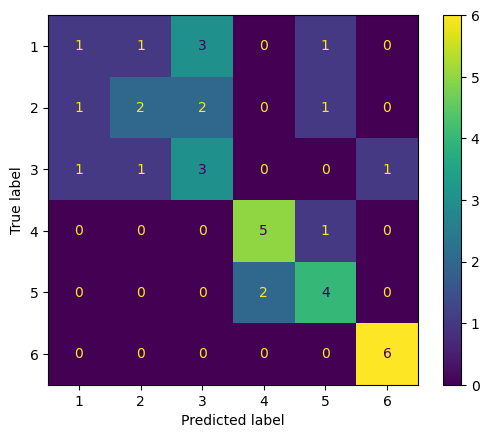

In [68]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

#### Q4.)


Accuracy for tree depth 2: for flattened features: 0.4722222222222222 for linear acceleration as features: 0.3888888888888889
Accuracy for tree depth 3: for flattened features: 0.5555555555555556 for linear acceleration as features: 0.4166666666666667
Accuracy for tree depth 4: for flattened features: 0.6111111111111112 for linear acceleration as features: 0.4722222222222222
Accuracy for tree depth 5: for flattened features: 0.75 for linear acceleration as features: 0.4166666666666667
Accuracy for tree depth 6: for flattened features: 0.6111111111111112 for linear acceleration as features: 0.5
Accuracy for tree depth 7: for flattened features: 0.5277777777777778 for linear acceleration as features: 0.5
Accuracy for tree depth 8: for flattened features: 0.6111111111111112 for linear acceleration as features: 0.5277777777777778
Accuracy for tree depth 9: for flattened features: 0.6111111111111112 for linear acceleration as features: 0.5


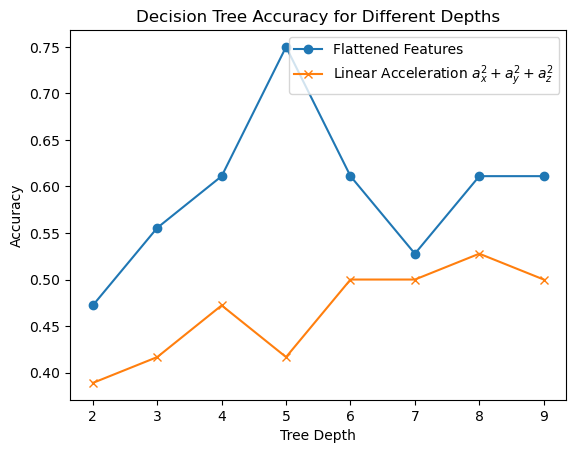

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1] * X_test.shape[2]))
depth_range = range(2,10)
accuracy_scores = []
accuracy_scores_linear=[]


for depth in depth_range:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf2=DecisionTreeClassifier(max_depth=depth)
    clf.fit(X_train_reshaped, y_train) 
    clf2.fit(X_train_linear,y_train)  
    y_pred = clf.predict(X_test_reshaped)
    y_pred_linear=clf2.predict(X_test_linear)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_linear=accuracy_score(y_test,y_pred_linear)
    accuracy_scores.append(accuracy)
    accuracy_scores_linear.append(accuracy_linear)
    print(f"Accuracy for tree depth {depth}: for flattened features: {accuracy} for linear acceleration as features: {accuracy_linear}")


# Plot the accuracy scores
plt.plot(depth_range, accuracy_scores, marker='o',label='Flattened Features')
plt.plot(depth_range,accuracy_scores_linear,marker='x',label='Linear Acceleration $a_x^2 + a_y^2 + a_z^2$')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Decision Tree Accuracy for Different Depths')
plt.show()

Accuracy peaks around a depth of 5 or 6, signalling that this is the optimal depth of decision tree which avoids overfitting and generalizes well. For depths less the 5 the tree is not complex enough and severely underfits above a depth of 6 the tree starts overfitting on the training dataset and the accuracy start going down on the test set. It is observed that flattening out $a_x, a_y, a_z$ & gives better results than using linear acceleration as linear acceleration has a loss of data of individual time series points.

#### Q5.)

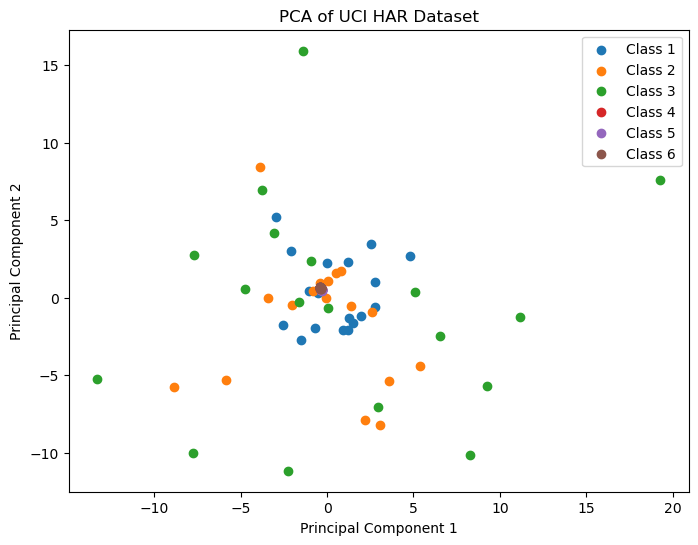

In [44]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Apply PCA to reduce to 2 components for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_train_linear)


plt.figure(figsize=(8, 6))
classes = np.unique(y_train)
scatter_handles = []

for cls in classes:
    indices = (y_train == cls)
    scatter = plt.scatter(pca_result[indices, 0], pca_result[indices, 1], label=f'Class {cls}')
    scatter_handles.append(scatter)

# Create legend
legend = plt.legend(handles=scatter_handles, title="Classes")
plt.title('PCA of UCI HAR Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [ ]:
fs=50 #sampling frequency
cfg=tsfel.get_features_by_domain()
X_train_tsfel=[]
for i in range(len(X_train_linear)):
    temp=tsfel.time_series_features_extractor(cfg,X_train_linear[i][:],fs)
    X_train_tsfel.append(np.array(temp).reshape(temp.shape[1]))
X_train_tsfel=np.array(X_train_tsfel)

In [ ]:
fs=50 #sampling frequency
cfg=tsfel.get_features_by_domain()
X_test_tsfel=[]
for i in range(len(X_test_linear)):
    temp=tsfel.time_series_features_extractor(cfg,X_test_linear[i][:],fs)
    X_test_tsfel.append(np.array(temp).reshape(temp.shape[1]))
X_test_tsfel=np.array(X_test_tsfel)

[]

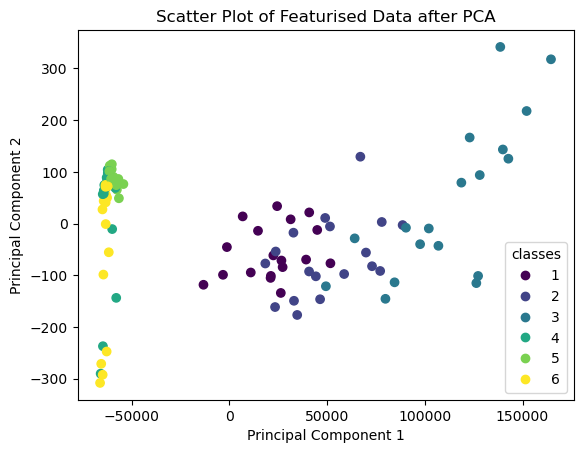

In [14]:
X_train_tsfel_pca=pca.fit_transform(X_train_tsfel)
scatter=plt.scatter(X_train_tsfel_pca[:,0],X_train_tsfel_pca[:,1],c=y_train)
legend=plt.legend(*scatter.legend_elements(),title="classes")
plt.title('Scatter Plot of Featurised Data after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.plot()

It is seen that after doing pca on the linear acceleration we do not get very meaningful clusters of classes as PCA can often perform poorly on linearly inseparable data. So, we see that after using `tsfel` for feature extraction, we get a much clearer distiction between static and dynamic activitites and these components prove to be more informative.

#### Q6.)

In [15]:
from sklearn import metrics
model = tree.DecisionTreeClassifier()
model.fit(X_train_tsfel, y_train)
y_hat = model.predict(X_test_tsfel)
print("Accuracy : ",metrics.accuracy_score(y_test, y_hat))

Accuracy :  0.6666666666666666


Accuracy for tree depth 2: for Raw Data (Flattened) : 0.4722 for Raw Data (Linear Acceleration): 0.3889 for Featurised Data 0.5278 for Featurised Extended Data 0.5000
Accuracy for tree depth 3: for Raw Data (Flattened) : 0.5556 for Raw Data (Linear Acceleration): 0.4167 for Featurised Data 0.6944 for Featurised Extended Data 0.7222
Accuracy for tree depth 4: for Raw Data (Flattened) : 0.6389 for Raw Data (Linear Acceleration): 0.5278 for Featurised Data 0.6667 for Featurised Extended Data 0.8056
Accuracy for tree depth 5: for Raw Data (Flattened) : 0.7500 for Raw Data (Linear Acceleration): 0.4167 for Featurised Data 0.6111 for Featurised Extended Data 0.8056
Accuracy for tree depth 6: for Raw Data (Flattened) : 0.7222 for Raw Data (Linear Acceleration): 0.4722 for Featurised Data 0.6667 for Featurised Extended Data 0.8056
Accuracy for tree depth 7: for Raw Data (Flattened) : 0.5000 for Raw Data (Linear Acceleration): 0.4722 for Featurised Data 0.6389 for Featurised Extended Data 0.750

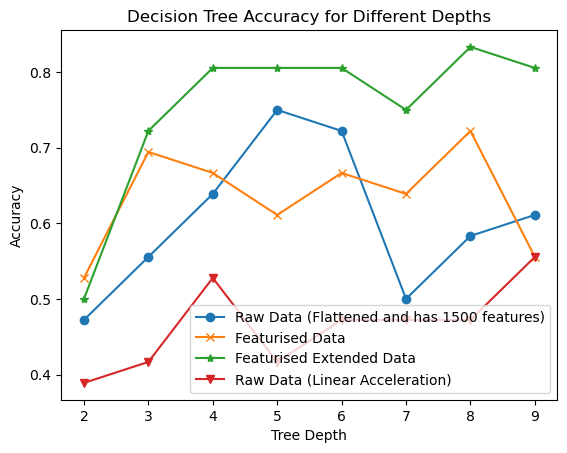

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1] * X_test.shape[2]))
X_train_tsfel_full=np.concatenate((X_train_reshaped,X_train_tsfel),axis=1)
X_test_tsfel_full=np.concatenate((X_test_reshaped,X_test_tsfel),axis=1)
depth_range = range(2,10)

accuracy_scores = []
accuracy_scores_tsfel=[]
accuracy_scores_tsfel_full=[]
accuracy_scores_linear=[]

for depth in depth_range:

    clf = DecisionTreeClassifier(max_depth=depth)
    clf2=DecisionTreeClassifier(max_depth=depth)
    clf3=DecisionTreeClassifier(max_depth=depth)
    clf4=DecisionTreeClassifier(max_depth=depth)
    clf.fit(X_train_reshaped, y_train)   
    clf2.fit(X_train_tsfel,y_train)
    clf3.fit(X_train_tsfel_full,y_train)
    clf4.fit(X_train_linear,y_train)
    y_pred = clf.predict(X_test_reshaped)
    y_pred_tsfel=clf2.predict(X_test_tsfel)
    y_pred_tsfel_full=clf3.predict(X_test_tsfel_full)
    y_pred_linear=clf4.predict(X_test_linear)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_tsfel=accuracy_score(y_test,y_pred_tsfel)
    accuracy_tsfel_full=accuracy_score(y_test,y_pred_tsfel_full)
    accuracy_linear = accuracy_score(y_test, y_pred_linear)
    accuracy_scores.append(accuracy)
    accuracy_scores_tsfel.append(accuracy_tsfel)
    accuracy_scores_tsfel_full.append(accuracy_tsfel_full)
    accuracy_scores_linear.append(accuracy_linear)

    
    print(f"Accuracy for tree depth {depth}: for Raw Data (Flattened) : {accuracy:.4f} for Raw Data (Linear Acceleration): {accuracy_linear:.4f} for Featurised Data {accuracy_tsfel:.4f} for Featurised Extended Data {accuracy_tsfel_full:.4f}")

# Plot the accuracy scores
plt.plot(depth_range, accuracy_scores, marker='o',label='Raw Data (Flattened and has 1500 features)')
plt.plot(depth_range,accuracy_scores_tsfel,marker='x',label='Featurised Data')
plt.plot(depth_range,accuracy_scores_tsfel_full,marker='*',label='Featurised Extended Data')
plt.plot(depth_range,accuracy_scores_linear,marker='v',label='Raw Data (Linear Acceleration)')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Decision Tree Accuracy for Different Depths')
plt.show()

#### Q.7)

We can observe from the confusion matrix that Dynamic Activities are most often misclassfied due to similarity. More specifically it often misclassifies "Walking upstairs" into "Walking Downstairs". It can also be seen from the waveform that these activities are highly correlated and the decision tree fails to classify them properly

## Deployment

In [17]:
#merging the training, val and test data of UCI dataset to train decision tree on the entire dataset.
X_train_full=np.concatenate((X_train,X_val,X_test),axis=0)
y_train_full=np.concatenate((y_train,y_val,y_test),axis=0)
print(X_train_full.shape)
print(y_train_full.shape)
X_train_full_reshape=X_train_full.reshape((X_train_full.shape[0],X_train_full.shape[1]*X_train_full.shape[2]))
print(X_train_full_reshape.shape)

(180, 500, 3)
(180,)
(180, 1500)


In [18]:
X_train_full_reshape.shape

(180, 1500)

In [ ]:
#extracting features using tsfel
fs=50 #sampling frequency
cfg=tsfel.get_features_by_domain()
X_train_full_tsfel=[]
for i in range(len(X_train_full)):
    temp=tsfel.time_series_features_extractor(cfg,X_train_full[i][:],fs)
    X_train_full_tsfel.append(np.array(temp).reshape(temp.shape[1]))
X_train_full_tsfel=np.array(X_train_full_tsfel)


In [51]:
#making decision tree on the entire dataset using tsfel features and raw data
clf1=tree.DecisionTreeClassifier()
clf2=tree.DecisionTreeClassifier()
clf1.fit(X_train_full_reshape,y_train_full)
clf2.fit(X_train_full_tsfel,y_train_full)




DecisionTreeClassifier()

In [21]:
from Deployment.deptest import X_test, y_test

Testing data shape:  (18, 500, 3)


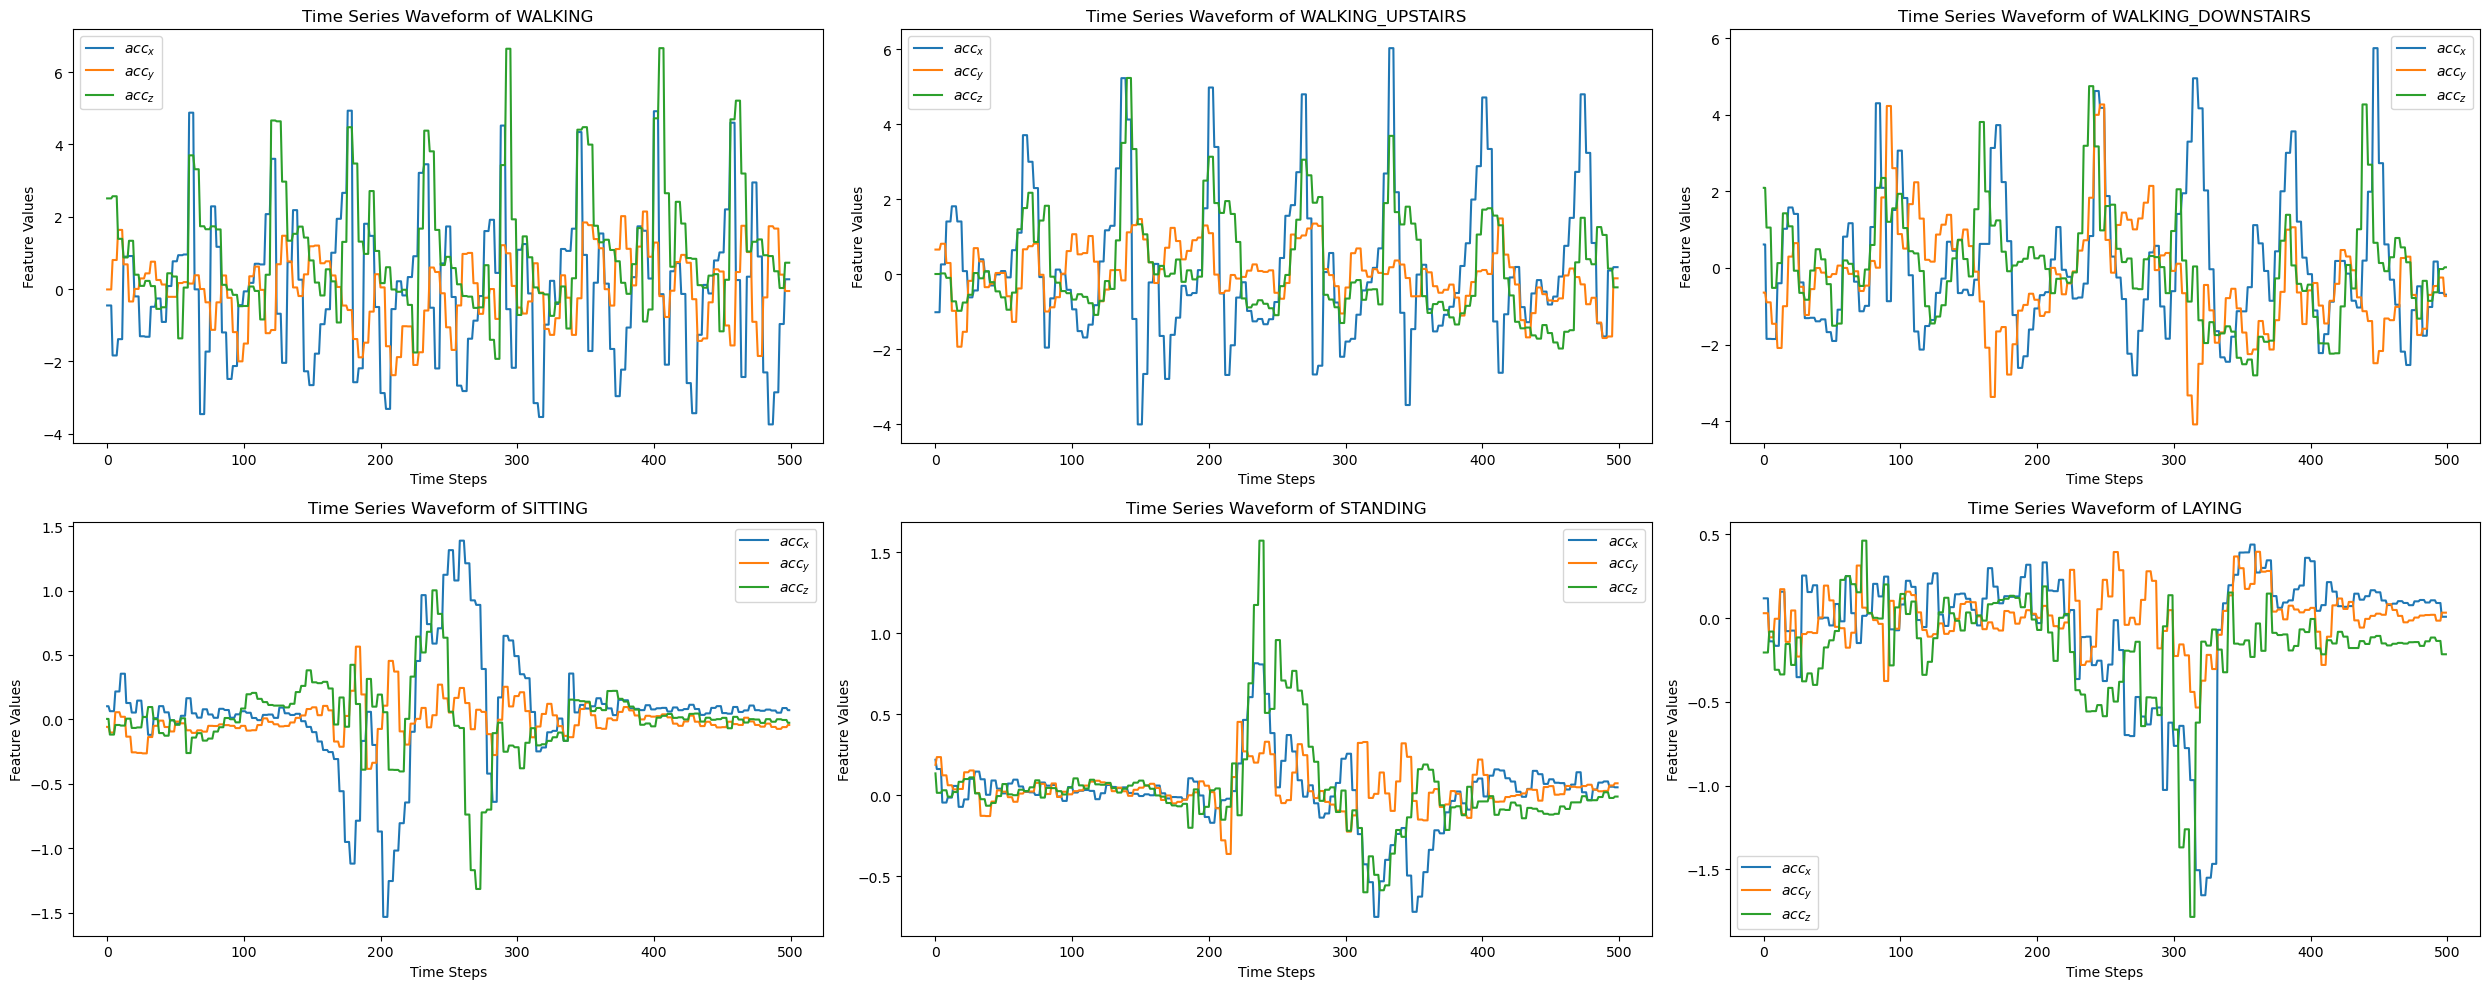

In [24]:
def plot_unique_samples(X, y, classlist):
    num_classes = len(classlist)
    num_rows = 2
    num_columns = 3
    keys = list(classes.keys())  # Assuming 'classes' is defined earlier

    plt.figure(figsize=(25, 10))

    for i, label in enumerate(classlist, start=1):
        plt.subplot(num_rows, num_columns, i)
        indices = np.where(y == label)[0]

        if indices.size > 0:
            Xsample = X[indices[2]]
            time_steps = np.arange(Xsample.shape[0])

            plt.plot(time_steps, Xsample[:, 0], label='$acc_x$')
            plt.plot(time_steps, Xsample[:, 1], label='$acc_y$')
            plt.plot(time_steps, Xsample[:, 2], label='$acc_z$')

            plt.xlabel('Time Steps')
            plt.ylabel('Feature Values')
            plt.title(f'Time Series Waveform of {keys[label-1]}')
            plt.legend()

    plt.tight_layout()
    plt.show()
    return

# Assuming 'classes' is defined earlier
classes = {"WALKING": 1, "WALKING_UPSTAIRS": 2, "WALKING_DOWNSTAIRS": 3, "SITTING": 4, "STANDING": 5, "LAYING": 6}
classlist = np.unique(y_test)
plot_unique_samples(X_test, y_test, classlist)


In [ ]:
#preparing the test data for decision tree
X_test_reshape=X_test.reshape((X_test.shape[0],X_test.shape[1]*X_test.shape[2]))
fs=50 #sampling frequency
cfg=tsfel.get_features_by_domain()
X_test_tsfel=[]
for i in range(len(X_test)):
    temp=tsfel.time_series_features_extractor(cfg,X_test[i][:],fs)
    X_test_tsfel.append(np.array(temp).reshape(temp.shape[1]))
X_test_tsfel=np.array(X_test_tsfel)


In [52]:
clf1.predict(X_test_reshape)
clf2.predict(X_test_tsfel)

#accuracy of decision tree on raw data
y_pred=clf1.predict(X_test_reshape)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
cm1=confusion_matrix(y_test,y_pred)


#accuracy of decision tree on featurised data
y_pred=clf2.predict(X_test_tsfel)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
cm2=confusion_matrix(y_test,y_pred)


Accuracy: 0.16666666666666666
Accuracy: 0.2777777777777778


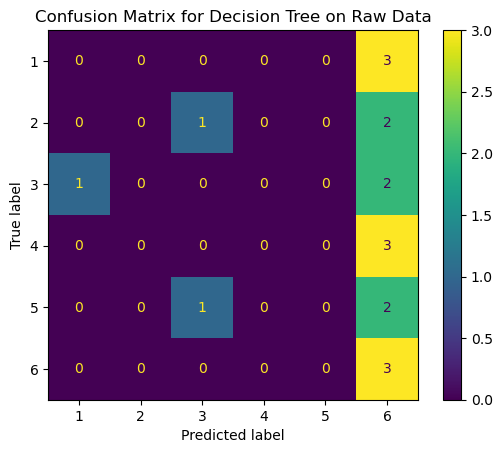

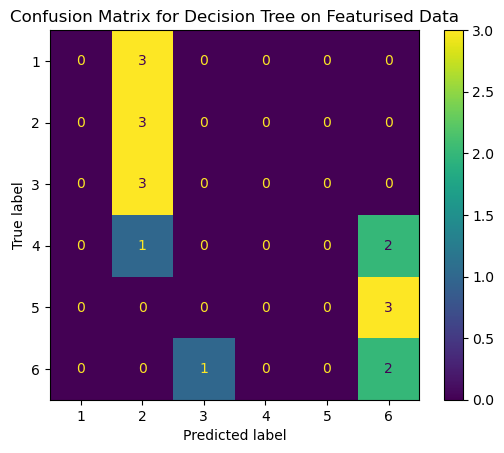

In [69]:
#displaying both the confusion matrix with title
disp=ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=clf1.classes_)
disp.plot()
plt.title('Confusion Matrix for Decision Tree on Raw Data')
plt.show()

disp=ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=clf2.classes_)
disp.plot()
plt.title('Confusion Matrix for Decision Tree on Featurised Data')
plt.show()


We get a much poorer accuracy as the training set is not representative of te testing set, as the data collection invariable introduces some noise and the data is not collected in a controlled environment. So, the model fails to generalize well on the testing set.

In particular for LAYING we see that there is a peculiar bump in the waveform at around 5 seconds which we hypothesize as breathing introduced noise in the data. This is not present in the training set and hence the model fails to generalize well on the testing set. Simililar noise is introduced in the other activities as well. This is a major reason for the poor accuracy of the model, but the featurised data is still able to achieve better than baseline accuracy that is random guessing.